# Confusion Matrix

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from random import randint

%matplotlib inline

def plot_matrix(data):
    plt.figure()
    plt.matshow(data)
    plt.show()
    
def scale_data(X):
    m = np.max(X)
    return X/m

In [3]:
data = keras.datasets.fashion_mnist 
(train_images, train_labels), (test_images, test_labels) = data.load_data()
labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Boot'] 
print ("Done.")

Done.


In [4]:
print (f"Format train_images: {train_images.shape}")
print (f"Formattrain_labels: {train_labels.shape}")
print (f"Format test_images: {test_images.shape}")
print (f"Formattest_labels: {test_labels.shape}")
print (f"Size labels: {len(labels)}")

Format train_images: (60000, 28, 28)
Formattrain_labels: (60000,)
Format test_images: (10000, 28, 28)
Formattest_labels: (10000,)
Size labels: 10


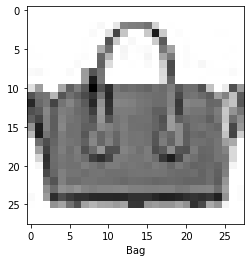

In [5]:
def plot_image(img, label):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xlabel(label)
    plt.show()

rnd = randint(0, train_images.shape[0])
hyp = labels[train_labels[rnd]]
plot_image(train_images[rnd], hyp)

In [6]:
train_images = scale_data(train_images)
test_images = scale_data(test_images)

In [7]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(len(labels), activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2022-04-24 13:14:13.948690: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 13:14:13.949136: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(train_images, train_labels, epochs=6)

Epoch 1/6


2022-04-24 13:14:20.863100: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-24 13:14:21.020291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 9s 4ms/step - loss: 0.4931 - accuracy: 0.8266
Epoch 2/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3708 - accuracy: 0.8651
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3337 - accuracy: 0.8778
Epoch 4/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3137 - accuracy: 0.8834
Epoch 5/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2922 - accuracy: 0.8922
Epoch 6/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2790 - accuracy: 0.8962


## de confusion matrix

2022-04-24 13:15:13.988739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


<class 'numpy.ndarray'>


<Figure size 432x288 with 0 Axes>

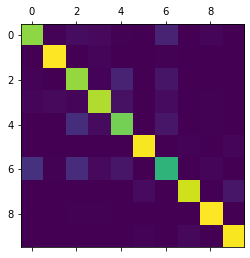

In [10]:
def conf_matrix(labels, pred):
    # Retourneer de econfusion matrix op basis van de gegeven voorspelling (pred) en de actuele
    # waarden (labels). 
    # Check eventueel de documentatie van tf.math.confusion_matrix:
    # https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix
    
    return tf.math.confusion_matrix(labels, pred)    

pred = np.argmax(model.predict(test_images), axis=1)
data = np.array(conf_matrix(test_labels, pred))
print(type(data))
plot_matrix(data)

In [11]:
print(data)
TP = np.diagonal(data)
print (np.sum(data, axis=0))

FP = np.sum(data, axis=0) - TP
FN = np.sum(data, axis=1) - TP
print (np.sum(data, axis=1))
TN = data.sum() - TP - FP - FN

print (TN)



[[814   9  34  24   6   0  98   0  15   0]
 [  0 979   0  14   3   0   4   0   0   0]
 [ 10   3 825  10  96   0  56   0   0   0]
 [ 19  26  14 862  43   0  29   0   6   1]
 [  0   2 130  29 776   0  59   0   4   0]
 [  0   0   0   1   0 970   0   9   1  19]
 [139   6 124  24  58   0 636   0  13   0]
 [  0   0   0   0   0  30   0 911   1  58]
 [  2   0   6   4   2   2   3   1 980   0]
 [  0   0   0   0   0   8   1  21   0 970]]
[ 984 1025 1133  968  984 1010  886  942 1020 1048]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
[8830 8954 8692 8894 8792 8960 8750 8969 8960 8922]


##  TP, TN, FP, FN

<p style="text-align:center">$\text{tp}_{i} = c_{ii}$</p>
<p style="text-align:center">$\text{fp}_{i} = \sum_{l=1}^n c_{li} - \text{tp}_{i}$</p>
<p style="text-align:center">$\text{fn}_{i} = \sum_{l=1}^n c_{il} - \text{tp}_{i}$<br/></p>
<p style="text-align:center">$\text{tn}_{i} = \sum_{l=1}^n \sum_{k=1}^n c_{lk} - \text{tp}_{i} - \text{fp}_{i} - \text{fn}_{i}$</p>


In [12]:
def conf_els(conf, labels): 
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.diagonal.html
    tot = conf.sum().sum()
    cols = conf.sum(axis=0)
    rows = conf.sum(axis=1)

    tp = conf.diagonal()
    fp = cols-tp
    fn = rows-tp
    tn = tot - tp - fp - fn
    
    res = list(zip(labels,tp,fp,fn,tn))
    return res



conf_els(data,labels)

[('T-shirt', 814, 170, 186, 8830),
 ('Trouser', 979, 46, 21, 8954),
 ('Pullover', 825, 308, 175, 8692),
 ('Dress', 862, 106, 138, 8894),
 ('Coat', 776, 208, 224, 8792),
 ('Sandals', 970, 40, 30, 8960),
 ('Shirt', 636, 250, 364, 8750),
 ('Sneaker', 911, 31, 89, 8969),
 ('Bag', 980, 40, 20, 8960),
 ('Boot', 970, 78, 30, 8922)]

<p style="text-align:center">$\text{sensitivity (TPR)} = \frac{tp}{tp + fn}$</p>
<p style="text-align:center">$\text{precision (PPV)} = \frac{tp}{tp + fp}$</p>
<p style="text-align:center">$\text{specificity (TNR)} = \frac{tn}{tn + fp}$</p>
<p style="text-align:center">$\text{fall-out (FPR)} = \frac{fp}{fp + tn}$</p>

In [13]:
def conf_data(metrics):

    tp = sum([foo[1] for foo in metrics])
    fp = sum([foo[2] for foo in metrics])
    fn = sum([foo[3] for foo in metrics])
    tn = sum([foo[4] for foo in metrics])

    rv = {}
    rv['tpr'] = tp / (tp+fn)
    rv['ppv'] = tp / (tp+fp)
    rv['tnr'] = tn / (tn+fp)
    rv['fpr'] = fp / (fp+tn)

    return rv

In [15]:
print ("Getting the confusion matrix:")
metrics = conf_els(data,labels)
print (metrics)
print ("Getting the different scores:")
scores = conf_data(metrics)
print (scores)

Getting the confusion matrix:
[('T-shirt', 814, 170, 186, 8830), ('Trouser', 979, 46, 21, 8954), ('Pullover', 825, 308, 175, 8692), ('Dress', 862, 106, 138, 8894), ('Coat', 776, 208, 224, 8792), ('Sandals', 970, 40, 30, 8960), ('Shirt', 636, 250, 364, 8750), ('Sneaker', 911, 31, 89, 8969), ('Bag', 980, 40, 20, 8960), ('Boot', 970, 78, 30, 8922)]
Getting the different scores:
{'tpr': 0.8723, 'ppv': 0.8723, 'tnr': 0.9858111111111111, 'fpr': 0.014188888888888888}
